In [42]:
#Shivam's Test Notebook for Partisan Project
%matplotlib inline

In [83]:
# RELOAD THIS WITH %load datasci.py EVERYTIME
# %load datasci.py
#Written by Shivam Parikh
#Wednesday, March 8th, 2017

import numpy as np
from datascience import Table
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (16,12)

def houseDictPerYear(year):
    dict = {'100':0, '95':0, '90':0, '85':0, '80':0, 'together':0, 'total': 0, 'nonpart':0}
    file_name = "../Bill_Documents/House/" + str(year) + "_house_bills.csv"
    with open(file_name, 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)
    total = int(dataset[1][23])+int(dataset[1][24])

    for vote in dataset[2:]:
        try:
            if(int(vote[21]) == 0 or int(vote[22])==0):
                dict['total'] += 1
                dict['together'] += 1
                continue
            repYes = int(vote[9])/int(vote[21])
            demYes = int(vote[13])/int(vote[21])
            repNo = int(vote[10])/int(vote[22])
            demNo = int(vote[14])/int(vote[22])
            biPart = [repYes,demYes,repNo,demNo]
            totalYes = int(vote[21])/(int(vote[21])+int(vote[22]))
            totalNo = int(vote[22])/(int(vote[21])+int(vote[22]))
            if(testPercentage([totalYes, totalNo], 0.95)):
                dict['together'] += 1
            elif(testPercentage(biPart, 1)):
                dict['100'] += 1
            elif(testPercentage(biPart, 0.95)):
                dict['95'] += 1
            elif(testPercentage(biPart, 0.9)):
                dict['90'] += 1
            elif(testPercentage(biPart, 0.85)):
                dict['85'] += 1
            elif(testPercentage(biPart, 0.8)):
                dict['80'] += 1
            else:
                dict['nonpart'] += 1
            dict['total'] += 1
        except IndexError:
            continue
    return dict

def senateDictPerYear(year):
    dict = {'100':0, '95':0, 'together':0, 'total': 0, 'nonpart':0}
    file_name = "../Bill_Documents/Senate/" + str(year) + "_senate_bills.csv"
    with open(file_name, 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)

    for vote in dataset[1:]:
        try:
            if(int(vote[22]) == 0 or int(vote[23])==0):
                dict['total'] += 1
                dict['together'] += 1
                continue
            repYes = int(vote[10])/int(vote[22])
            demYes = int(vote[14])/int(vote[22])
            repNo = int(vote[11])/int(vote[23])
            demNo = int(vote[15])/int(vote[23])
            biPart = [repYes,demYes,repNo,demNo]
            totalYes = int(vote[22])/(int(vote[22])+int(vote[23]))
            totalNo = int(vote[23])/(int(vote[22])+int(vote[23]))
            if(testPercentage([totalYes, totalNo], 0.95)):
                dict['together'] += 1
            elif(testPercentage(biPart, 1)):
                dict['100'] += 1
            elif(testPercentage(biPart, 0.95)):
                dict['95'] += 1
            else:
                dict['nonpart'] += 1
            dict['total'] += 1
        except IndexError:
            continue
    return dict

def testPercentage(array, percentage):
    for each in array:
        if(each >= percentage):
            return True
    return False

def datasci():
    plt.xticks(np.arange(1989, 2023, 2))
    cong_dict = [houseDictPerYear(y) for y in range(1990, 2018)]
    sen_dict = [senateDictPerYear(y) for y in range(1990, 2018)]
    house = Table().with_columns("Year", np.arange(1990, 2018),
                                    "House Partisan", np.array([(x['100']+x['95'])*100/x['total'] for x in cong_dict]),
                                    "House Non Partisan", np.array([x['nonpart']*100/x['total'] for x in cong_dict]),
                                    "House Bipartisan", np.array([x['together']*100/x['total'] for x in cong_dict]))
    senate = Table().with_columns("Year", np.arange(1990, 2018),
                                    "Senate Partisan", np.array([(x['100']+x['95'])*100/x['total'] for x in sen_dict]),
                                    "Senate Non Partisan", np.array([x['nonpart']*100/x['total'] for x in sen_dict]),
                                    "Senate Bipartisan", np.array([x['together']*100/x['total'] for x in sen_dict]))
    total = senate.join("Year", house)
    plt.axis([1989, 2022, 0, 100])
    #plt.plot(total.column("Year"), total.column("House Partisan"), 'k', c='g', label="House Partisan Vote Percentage", linewidth=3)
    #plt.plot(total.column("Year"), total.column("Senate Partisan"), 'k', c='y', label="Senate Partisan Vote Percentage", linewidth=3)
    #plt.plot(total.column("Year"), total.column("House Non Partisan"), 'k', c='g', label="House Non Partisan", linewidth=3)
    #plt.plot(total.column("Year"), total.column("Senate Non Partisan"), 'k', c='y', label="Senate Non Partisan", linewidth=3)
    plt.plot(total.column("Year"), total.column("House Bipartisan"), 'k', c='g', label="House Bipartisan", linewidth=3)
    plt.plot(total.column("Year"), total.column("Senate Bipartisan"), 'k', c='y', label="Senate Bipartisan", linewidth=3)
    drawParties(plt, "both")
    plt.legend(loc=1, fontsize=15)
    plt.title("Percentage of Votes that were Bipartisan in Both Chambers", fontsize=20)
    plt.ylabel("Percentage of Total Votes", fontsize=15)
    plt.xlabel("Years (1990-2017)", fontsize=15)
    plt.savefig("Join_Final_Bipartisan.png")
    plt.show()
    

def houseGenerateLine():
    dict = {}
    plt.axis([1989, 2022, 0, 100])
    plt.xticks(np.arange(1989, 2023, 2))
    for year in range(1990, 2018):
        temp = houseDictPerYear(year)
        bipartisan = temp['together']/temp['total']
        partisan = (temp['100']+temp['95'])/temp['total']
        nonpart = (temp['nonpart']+temp['80']+temp['85']+temp['90'])/temp['total']
        dict[year] = (bipartisan, partisan, nonpart)
    plt.plot(sorted(dict.keys()), [dict[x][0]*100 for x in sorted(dict.keys())],
             'k', c='g', label=">=95% Bipartisan (Agreement)", linewidth=3)
    plt.plot(sorted(dict.keys()), [dict[x][1]*100 for x in sorted(dict.keys())],
             'k', c='r', label=">=95% Partisan (Disagreement)", linewidth=3)
    plt.plot(sorted(dict.keys()), [dict[x][2]*100 for x in sorted(dict.keys())],
             'k', c='b', label="All Other Votes (Not Extreme Agreement or Disagreement)", linewidth=3)
    drawParties(plt, "house")
    plt.legend(loc=1, fontsize=15)
    plt.title("(Bi)Partisan Voting in the\nU.S. House of Representatives from 1990-2017", fontsize=20)
    plt.ylabel("Percentage of Total Votes in the House (0-100%)", fontsize=15)
    plt.xlabel("Years (1990-2017)", fontsize=15)
    plt.savefig("HOR_Final.png")
    plt.show()

def senateGenerateLine():
    dict = {}
    plt.axis([1989, 2022, 0, 100])
    plt.xticks(np.arange(1989, 2023, 2))
    for year in range(1990, 2018):
        temp = senateDictPerYear(year)
        bipartisan = temp['together']/temp['total']
        partisan = (temp['100']+temp['95'])/temp['total']
        nonpart = (temp['nonpart'])/temp['total']
        dict[year] = (bipartisan, partisan, nonpart)
    plt.plot(sorted(dict.keys()), [dict[x][0]*100 for x in sorted(dict.keys())],
            'k', c='g', label=">=95% Bipartisan (Agreement)", linewidth=3)
    plt.plot(sorted(dict.keys()), [dict[x][1]*100 for x in sorted(dict.keys())],
            'k', c='r', label=">=95% Partisan (Disagreement)", linewidth=3)
    plt.plot(sorted(dict.keys()), [dict[x][2]*100 for x in sorted(dict.keys())],
            'k', c='b', label="All Other Votes (Neither Extreme Agreement or Disagreement)", linewidth=3)
    plt.legend(loc=1, fontsize=15)
    drawParties(plt, "senate")
    plt.title("(Bi)Partisan Voting in the\nU.S. Senate from 1990-2017", fontsize=20)
    plt.ylabel("Percentage of Total Votes in the Senate (0-100%)", fontsize=15)
    plt.xlabel("Years (1990-2017)", fontsize=15)
    plt.savefig("Senate_Final.png")
    plt.show()

def drawParties(plot, party="president"):
    with open("/Users/ShivamParikh/Development/partisan/Bill_Documents/majority.csv", 'r', errors = 'ignore') as f:
        reader = csv.reader(f)
        dataset = list(reader)
    dataset = dataset[1:]
    if(party == "president"):
        set = [3, 1, 2]
        plot.annotate("Party Majority in Senate", xy=(1990,70), xytext=(1989.4,2), fontsize=17)
        plot.annotate("Party Majority in House", xy=(1990,20), xytext=(1989.4,7), fontsize=17)
        plot.annotate("President's\nParty", xy=(1990,0),xytext=(1989.4,80), fontsize=17)
    elif(party == "senate"):
        set = [2, 1, 3]
        plot.annotate("Majority Party\nin Senate", xy=(1990,70), xytext=(1989.4,65), fontsize=17)
        plot.annotate("Majority Party in House", xy=(1990,20), xytext=(1989.4,7), fontsize=17)
        plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,2), fontsize=17)
    elif(party == "both"):
        for row in dataset:
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 6), 1, 47,
                                            alpha=0.4, facecolor=color(row[2])))#senate
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 53), 1, 0.5, facecolor='black'))
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 53.5), 1, 47,
                                            alpha=0.4, facecolor=color(row[1])))#house
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 5.5), 1, 0.5, facecolor='black'))
            plot.gca().add_patch(patches.Rectangle((int(row[0]), 0), 1, 5.5,
                                            alpha=0.4, facecolor=color(row[3])))#president
            plot.annotate("Majority Party\nin Senate", xy=(1990,70), xytext=(1989.4,7), fontsize=17)
            plot.annotate("Majority Party\nin House", xy=(1990,20), xytext=(1989.4,65), fontsize=17)
            plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,1),fontsize=17)
        return
    else:
        set = [1, 2, 3]
        plot.annotate("Majority Party in Senate", xy=(1990,70), xytext=(1989.4,7), fontsize=17)
        plot.annotate("Majority Party\nin House", xy=(1990,20), xytext=(1989.4,65), fontsize=17)
        plot.annotate("President's Party", xy=(1990,0),xytext=(1989.4,2), fontsize=17)
    for row in dataset:
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 11), 1, 89,
                                        alpha=0.4, facecolor=color(row[set[0]])))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 10.5), 1, .5, facecolor='black'))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 5.5), 1, 5,
                                        alpha=0.4, facecolor=color(row[set[1]])))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 5), 1, .5, facecolor='black'))
        plot.gca().add_patch(patches.Rectangle((int(row[0]), 0), 1, 5,
                                        alpha=0.4, facecolor=color(row[set[2]])))
    

def color(party):
    if(party == 'D'):
        return 'blue'
    elif(party=='R'):
        return 'red'
    else:
        return 'grey'


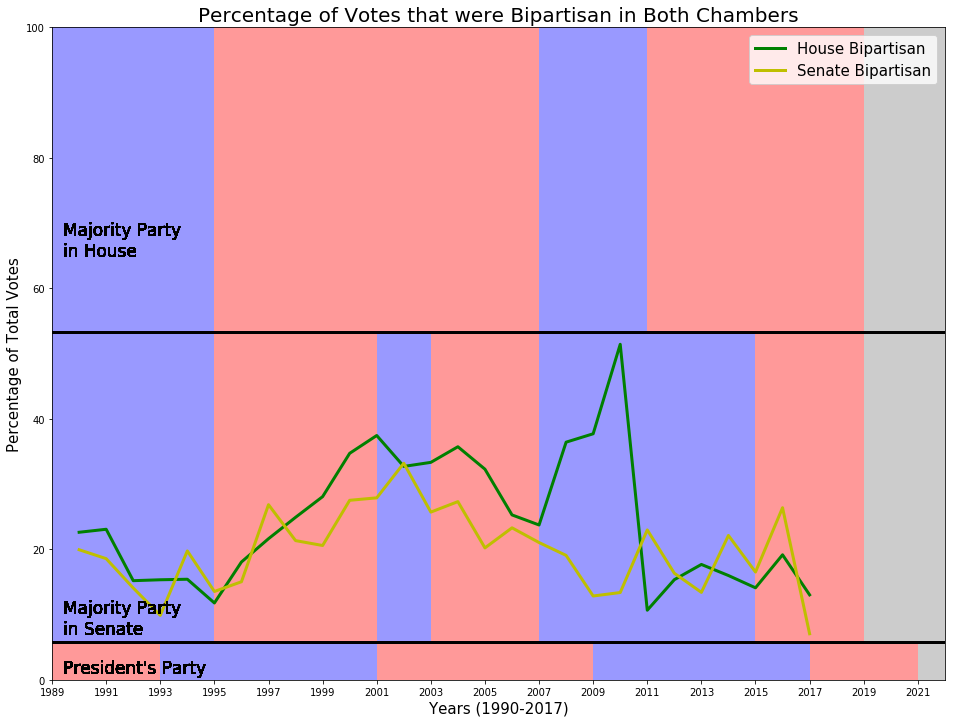

In [84]:
datasci()
# senateGenerateLine()
# houseGenerateLine()